In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install dash

Poniżej znajduje się kod który uruchomi aplikację. Pamiętaj tylko że aplikacja Dash musi się znajdować w zmiennej o nazwie `app`.


In [35]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

import threading
from google.colab import output

import dash
from dash import html, dcc, Input, Output

In [63]:
df = pd.read_csv('/content/drive/MyDrive/Portfolio/Project_2/COVID_19_Data.csv')

In [64]:
df

,index,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,hosp_patients,...,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population,median_age,gdp_per_capita,life_expectancy,latitude,longitude
0,0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
1,1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
2,2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
3,3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
4,4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180472,190608,ZWE,Africa,Zimbabwe,2022-06-14,254155.0,0.0,5521.0,0.0,NaN,...,6270096.0,4563366.0,1026048.0,NaN,15092171.0,19.6,1899.775,61.49,-20.0,30.0
180473,190609,ZWE,Africa,Zimbabwe,2022-06-15,254387.0,232.0,5525.0,4.0,NaN,...,6271703.0,4567466.0,1027822.0,7481.0,15092171.0,19.6,1899.775,61.49,-20.0,30.0
180474,190610,ZWE,Africa,Zimbabwe,2022-06-16,254502.0,115.0,5526.0,1.0,NaN,...,6274305.0,4570349.0,1029463.0,7126.0,15092171.0,19.6,1899.775,61.49,-20.0,30.0
180475,190611,ZWE,Africa,Zimbabwe,2022-06-17,254753.0,251.0,5533.0,7.0,NaN,...,6276402.0,4574222.0,1031790.0,8297.0,15092171.0,19.6,1899.775,61.49,-20.0,30.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180477 entries, 0 to 180476
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   index                    180477 non-null  int64  
 1   iso_code                 180477 non-null  object 
 2   continent                180477 non-null  object 
 3   location                 180477 non-null  object 
 4   date                     180477 non-null  object 
 5   total_cases              173493 non-null  float64
 6   new_cases                173212 non-null  float64
 7   total_deaths             155323 non-null  float64
 8   new_deaths               155095 non-null  float64
 9   hosp_patients            27152 non-null   float64
 10  total_tests              78326 non-null   float64
 11  new_tests                74509 non-null   float64
 12  tests_per_case           92600 non-null   float64
 13  total_vaccinations       46366 non-null   float64
 14  peop

In [6]:
df.isna().sum()

,0
index,0
iso_code,0
continent,0
location,0
date,0
total_cases,6984
new_cases,7265
total_deaths,25154
new_deaths,25382
hosp_patients,153325


In [7]:
df.drop_duplicates()

,index,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,hosp_patients,...,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population,median_age,gdp_per_capita,life_expectancy,latitude,longitude
0,0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
1,1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
2,2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
3,3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
4,4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180472,190608,ZWE,Africa,Zimbabwe,2022-06-14,254155.0,0.0,5521.0,0.0,NaN,...,6270096.0,4563366.0,1026048.0,NaN,15092171.0,19.6,1899.775,61.49,-20.0,30.0
180473,190609,ZWE,Africa,Zimbabwe,2022-06-15,254387.0,232.0,5525.0,4.0,NaN,...,6271703.0,4567466.0,1027822.0,7481.0,15092171.0,19.6,1899.775,61.49,-20.0,30.0
180474,190610,ZWE,Africa,Zimbabwe,2022-06-16,254502.0,115.0,5526.0,1.0,NaN,...,6274305.0,4570349.0,1029463.0,7126.0,15092171.0,19.6,1899.775,61.49,-20.0,30.0
180475,190611,ZWE,Africa,Zimbabwe,2022-06-17,254753.0,251.0,5533.0,7.0,NaN,...,6276402.0,4574222.0,1031790.0,8297.0,15092171.0,19.6,1899.775,61.49,-20.0,30.0


In [8]:
from datetime import date

df['date'] = df['date'].astype('datetime64[ns]')
df['population'] = df['population'].astype('int64')

In [9]:
df.dtypes

,0
index,int64
iso_code,object
continent,object
location,object
date,datetime64[ns]
total_cases,float64
new_cases,float64
total_deaths,float64
new_deaths,float64
hosp_patients,float64


!!! CHART 1 !!!

In [10]:
df_country = df.drop_duplicates(subset='location').sort_values(by='population', ascending=False).head(10)
df_country

,index,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,hosp_patients,...,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population,median_age,gdp_per_capita,life_expectancy,latitude,longitude
33499,35161,CHN,Asia,China,2020-01-22,547.0,NaN,17.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1444216102,38.7,15308.712,76.91,35.0,105.0
74570,77062,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1393409033,28.2,6426.674,69.66,20.0,77.0
170959,179390,USA,North America,United States,2020-01-22,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,332915074,38.3,54225.446,78.86,38.0,-97.0
75441,77933,IDN,Asia,Indonesia,2020-03-02,2.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,276361788,29.3,11188.744,71.72,-5.0,120.0
122998,127141,PAK,Asia,Pakistan,2020-02-25,2.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,225199929,23.5,5034.708,67.27,30.0,70.0
21805,22635,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,213993441,33.5,14103.452,75.88,-10.0,-55.0
118134,122277,NGA,Africa,Nigeria,2020-02-28,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,211400704,18.1,5338.454,54.69,10.0,8.0
12663,12663,BGD,Asia,Bangladesh,2020-03-08,3.0,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,166303494,27.5,3523.984,72.59,24.0,90.0
133450,137593,RUS,Europe,Russia,2020-01-31,2.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,145912022,39.6,24765.954,72.58,60.0,100.0
103850,107179,MEX,North America,Mexico,2020-01-01,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,130262220,29.3,17336.469,75.05,23.0,-102.0


In [11]:
df_country.dtypes

,0
index,int64
iso_code,object
continent,object
location,object
date,datetime64[ns]
total_cases,float64
new_cases,float64
total_deaths,float64
new_deaths,float64
hosp_patients,float64


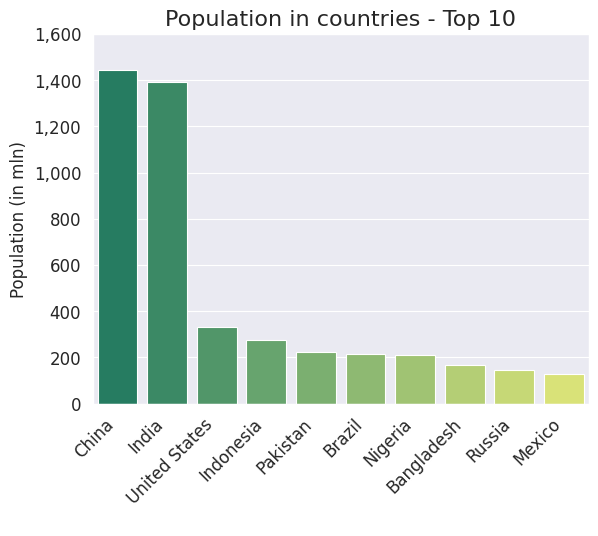

<Figure size 1200x800 with 0 Axes>

In [23]:
sns.set_theme() # nadpisuje formatowanie dla wszystkich wizualizacji stworzonych z wykorzystaniem matplotlib
sns.set_style("darkgrid") # dostępne opcje to darkgrid (domyślna), whitegrid, dark, white i ticks
sns.set_context("paper") # dostępne opcje to notebook (domyślna), paper, talk i poster.

fig_top_10 = sns.barplot(x='location', y='population', hue='location', data=df_country, palette='summer', legend=False)

xticks = fig_top_10.get_xticks()
fig_top_10.set_xticks(xticks)
fig_top_10.set_xticklabels(fig_top_10.get_xticklabels(), rotation=45, ha='right', size=12)

yticks = fig_top_10.get_yticks()
fig_top_10.set_yticks(yticks)
fig_top_10.set_yticklabels([f'{int(y/1_000_000):,}' for y in yticks], size=12)

plt.title('Population in countries - Top 10', fontsize=16, loc='center')
plt.xlabel(' ')
plt.ylabel('Population (in mln)', fontsize=12)

plt.figure(figsize=(12, 8))
plt.show()

!!! CHART 2 !!!

In [25]:
df_age_final = df.drop_duplicates(subset='location').sort_values(by='population', ascending=False).head(20)
df_age_final

,index,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,hosp_patients,...,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population,median_age,gdp_per_capita,life_expectancy,latitude,longitude
33499,35161,CHN,Asia,China,2020-01-22,547.0,NaN,17.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1444216102,38.7,15308.712,76.91,35.0,105.0
74570,77062,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1393409033,28.2,6426.674,69.66,20.0,77.0
170959,179390,USA,North America,United States,2020-01-22,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,332915074,38.3,54225.446,78.86,38.0,-97.0
75441,77933,IDN,Asia,Indonesia,2020-03-02,2.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,276361788,29.3,11188.744,71.72,-5.0,120.0
122998,127141,PAK,Asia,Pakistan,2020-02-25,2.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,225199929,23.5,5034.708,67.27,30.0,70.0
21805,22635,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,213993441,33.5,14103.452,75.88,-10.0,-55.0
118134,122277,NGA,Africa,Nigeria,2020-02-28,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,211400704,18.1,5338.454,54.69,10.0,8.0
12663,12663,BGD,Asia,Bangladesh,2020-03-08,3.0,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,166303494,27.5,3523.984,72.59,24.0,90.0
133450,137593,RUS,Europe,Russia,2020-01-31,2.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,145912022,39.6,24765.954,72.58,60.0,100.0
103850,107179,MEX,North America,Mexico,2020-01-01,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,130262220,29.3,17336.469,75.05,23.0,-102.0


In [27]:
fig_top_20 = px.scatter(
    data_frame=df_age_final,
    x="population",
    y="life_expectancy",
    labels={"population": "Population",
            "life_expectancy": "Life expectancy (in years) ",
            "location": "Country ",
            "continent": "Continent ",
            "iso_code": "ISO_Code "},
    title=("Life expectancy in countries - Top 20"),
    size="population",
    size_max=50,
    color="location",
    hover_name="location",
    hover_data=["continent", "iso_code"],
    log_x=True,
    width=1200,
    height=800,
    template="plotly_dark"
    )

fig_top_20.show()

!!! CHART 3 !!!

In [31]:
df_comparision = df.loc[(df['location'] == 'Poland') |
                        (df['location'] == 'Germany')]

df_comparision['new_date'] = df_comparision['date'].dt.strftime('%Y-%m')

df_comparision

/tmp/ipython-input-2866512444.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,index,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,hosp_patients,...,people_fully_vaccinated,total_boosters,new_vaccinations,population,median_age,gdp_per_capita,life_expectancy,latitude,longitude,new_date
60677,63169,DEU,Europe,Germany,2020-01-27,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,83900471,46.6,45229.245,81.33,51.0,9.0,2020-01
60678,63170,DEU,Europe,Germany,2020-01-28,4.0,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,83900471,46.6,45229.245,81.33,51.0,9.0,2020-01
60679,63171,DEU,Europe,Germany,2020-01-29,4.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,83900471,46.6,45229.245,81.33,51.0,9.0,2020-01
60680,63172,DEU,Europe,Germany,2020-01-30,4.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,83900471,46.6,45229.245,81.33,51.0,9.0,2020-01
60681,63173,DEU,Europe,Germany,2020-01-31,5.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,83900471,46.6,45229.245,81.33,51.0,9.0,2020-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130090,134233,POL,Europe,Poland,2022-06-14,6010411.0,321.0,116380.0,9.0,NaN,...,22507407.0,12132228.0,3478.0,37797000,41.8,27216.445,78.73,52.0,20.0,2022-06
130091,134234,POL,Europe,Poland,2022-06-15,6010643.0,232.0,116387.0,7.0,NaN,...,NaN,NaN,NaN,37797000,41.8,27216.445,78.73,52.0,20.0,2022-06
130092,134235,POL,Europe,Poland,2022-06-16,6010871.0,228.0,116390.0,3.0,NaN,...,22507978.0,12134586.0,NaN,37797000,41.8,27216.445,78.73,52.0,20.0,2022-06
130093,134236,POL,Europe,Poland,2022-06-17,6010919.0,48.0,116390.0,0.0,NaN,...,22508613.0,12137087.0,3390.0,37797000,41.8,27216.445,78.73,52.0,20.0,2022-06


In [33]:
df_monthly_summary = df_comparision.groupby(['location', 'new_date']).agg(
    new_cases=('new_cases', 'sum'),
    new_deaths=('new_deaths', 'sum'),
    new_tests=('new_tests', 'sum'),
    total_cases=('total_cases', 'max'),
    total_deaths=('total_deaths', 'max'),
    total_tests=('total_tests', 'max')
).reset_index()

df_monthly_summary

,location,new_date,new_cases,new_deaths,new_tests,total_cases,total_deaths,total_tests
0,Germany,2020-01,5.0,0.0,0.0,5.0,NaN,NaN
1,Germany,2020-02,61.0,0.0,0.0,66.0,NaN,NaN
2,Germany,2020-03,61847.0,583.0,0.0,61913.0,583.0,881424.0
3,Germany,2020-04,97206.0,5705.0,0.0,159119.0,6288.0,2386406.0
4,Germany,2020-05,22363.0,2212.0,0.0,181482.0,8500.0,4296092.0
5,Germany,2020-06,12777.0,474.0,0.0,194259.0,8973.0,5824057.0
6,Germany,2020-07,14439.0,168.0,0.0,208698.0,9141.0,7951451.0
7,Germany,2020-08,33683.0,164.0,0.0,242381.0,9298.0,12299391.0
8,Germany,2020-09,46838.0,190.0,0.0,289219.0,9488.0,16868956.0
9,Germany,2020-10,229534.0,964.0,0.0,518753.0,10452.0,21946883.0


In [34]:
fig_line = px.line(
    data_frame=df_monthly_summary,
    x="new_date",
    y="new_cases",
    color="location",
    markers=True,
    width=1200,
    height=800,
    labels={"new_date": "Time flow (months, years) ",
            "new_cases": "New cases of Covid-19 (in mln) ",
            "location": "Country "},
    title=("New cases of COVID 19 in Poland and Zimbabwe - timeline"),
    template="plotly_dark"
    )

fig_line.update_xaxes(
    dtick="M1",
    tickformat="%m-%Y",
    tickangle=35,
)

fig_line.show()

!!! MAP 1 !!!

In [62]:
mapbox_token = 'pk.eyJ1IjoiY2V6YXJ5cCIsImEiOiJjbWJ4cXNqMHUxN3E4MmtzMDBraWw2aHRsIn0.HuYu7oK6Hfpg6Dz0bgUkrA'
px.set_mapbox_access_token(mapbox_token)

df_map = df[df['date'] == df['date'].max()].fillna(0)
df_map["cases_per_1000"] = (df_map["total_cases"] / df_map["population"] * 1000).round(1)

fig_map = px.scatter_mapbox(
    data_frame= df_map,
    lat="latitude",
    lon="longitude",
    color="continent",
    size="cases_per_1000",
    size_max=20,
    hover_name="location",
    hover_data={"total_cases": True,
                "latitude": False,
                "longitude": False,
                "cases_per_1000": True},
    labels={"continent": "Continent ",
            "total_cases": "Total cases ",
            "cases_per_1000": "Cases per 1000 peoples "},
    zoom=2,
    template="plotly_dark",
    title="Map of COVID-19 cases by country and continent",
)

fig_map.update_layout(
    mapbox_style="carto-darkmatter",
    margin={"r":0, "t":40, "l":0, "b":0}
)

fig_map.show()

!!! DASHBOARD 1 !!!

In [ ]:
df

,index,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,hosp_patients,...,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population,median_age,gdp_per_capita,life_expectancy,latitude,longitude
0,0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428,18.6,1803.987,64.83,33.0,65.0
1,1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428,18.6,1803.987,64.83,33.0,65.0
2,2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428,18.6,1803.987,64.83,33.0,65.0
3,3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428,18.6,1803.987,64.83,33.0,65.0
4,4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428,18.6,1803.987,64.83,33.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180472,190608,ZWE,Africa,Zimbabwe,2022-06-14,254155.0,0.0,5521.0,0.0,NaN,...,6270096.0,4563366.0,1026048.0,NaN,15092171,19.6,1899.775,61.49,-20.0,30.0
180473,190609,ZWE,Africa,Zimbabwe,2022-06-15,254387.0,232.0,5525.0,4.0,NaN,...,6271703.0,4567466.0,1027822.0,7481.0,15092171,19.6,1899.775,61.49,-20.0,30.0
180474,190610,ZWE,Africa,Zimbabwe,2022-06-16,254502.0,115.0,5526.0,1.0,NaN,...,6274305.0,4570349.0,1029463.0,7126.0,15092171,19.6,1899.775,61.49,-20.0,30.0
180475,190611,ZWE,Africa,Zimbabwe,2022-06-17,254753.0,251.0,5533.0,7.0,NaN,...,6276402.0,4574222.0,1031790.0,8297.0,15092171,19.6,1899.775,61.49,-20.0,30.0


In [61]:
app_1 = dash.Dash()

countries_list = list(df['location'].drop_duplicates())

app_1.layout = html.Div([
    html.H2(id='dashboard-title'),
    html.Div(children=[
    html.H3("Choose country:",
            style={"color": "white"}),
    html.Br(),
    dcc.Dropdown(
        id='country-dropdown',
        options=countries_list,
        value=countries_list[0],
        style={'display': 'inline-block', 'width': '35%'}),
    ]),
    html.Br(),
    html.Div(children=[
        dcc.Graph(id="cases-line-chart", style={'width': '50%'}),
        dcc.Graph(id="deaths-line-chart", style={'width': '50%'})
    ],style = {"display":"flex"})
])

@app_1.callback(
    Output('dashboard-title', 'children'),
    Output('cases-line-chart', 'figure'),
    Output('deaths-line-chart', 'figure'),
    Input('country-dropdown', 'value')
)
def update_dashboard(selected_country):
    filtered_df = df[df['location'] == selected_country]

    fig_cases = px.line(filtered_df,
                        x="date",
                        y="total_cases",
                        markers=True,
                        labels={"date": "Date",
                                 "total_cases": "Total cases"},
                        title="Cumulated cases value",
                        template="plotly_dark")

    fig_deaths = px.line(filtered_df,
                         x="date",
                         y="total_deaths",
                         markers=True,
                         labels={"date": "Date",
                                 "total_deaths": "Total deaths"},
                         title="Cumulated deaths value",
                         template="plotly_dark")

    title = html.H2(f"Cumulative COVID-19 data for {selected_country}",
                    style={'color': 'white'})

    return title, fig_cases, fig_deaths

In [49]:
thread = threading.Thread(target=app_1.run)
thread.start()
output.serve_kernel_port_as_iframe(port=8050)

<IPython.core.display.Javascript object>

!!! DASHBOARD 2 !!!

In [50]:
mapbox_token = 'pk.eyJ1IjoiY2V6YXJ5cCIsImEiOiJjbWJ4cXNqMHUxN3E4MmtzMDBraWw2aHRsIn0.HuYu7oK6Hfpg6Dz0bgUkrA'
px.set_mapbox_access_token(mapbox_token)

df_map_3 = df.loc[(df['date'] == '2022-05-31')].fillna(0)

statistic_keys = {
    'total_cases': 'Total cases',
    'total_deaths': 'Total deaths',
    'hosp_patients': 'Hospitalized patients',
    'total_tests': 'Total tests',
    'tests_per_case': 'Test per case',
    'total_vaccinations': 'Total vaccinations',
    'people_vaccinated': 'Vaccinated peoples',
    'people_fully_vaccinated': 'Fully vaccinated peoples'}

continent_list = list(df['continent'].drop_duplicates())

app_2 = dash.Dash()

app_2.layout = html.Div([
    html.H2(id='title'),
    html.Div(children=[
    html.H3(("Choose continent:"),
        style={'color': 'white'}),
    dcc.Dropdown(
        id='continent',
        options=[{'value': continent, 'label': continent}
                 for continent in continent_list],
        value=continent_list[0],
        style={'display': 'inline-block', 'width': '35%'}),

    html.H3(("Choose statistic:"),
            style={'color': 'white'}),
    dcc.Dropdown(
        id='statistic',
        options=[{"value": statistic, "label": statistic_label}
                 for statistic, statistic_label in statistic_keys.items()],
        value='total_cases',
        style={'display': 'inline-block', 'width': '35%'}),
    ]),
    html.Br(),
    html.Div(children=[
        dcc.Graph(id="map"),
    ])
])

@app_2.callback(
    Output("map", "figure"),
    Output("title", "children"),
    [Input("continent", "value"),
    Input("statistic", "value")]
)

def update_map(continent, statistic):
    df_map_filtered = df_map_3[df_map_3["continent"] == continent]

    fig_map_2 = px.scatter_mapbox(
        data_frame= df_map_filtered,
        lat="latitude",
        lon="longitude",
        size=df_map_filtered[statistic],
        size_max=30,
        hover_name="location",
        hover_data={"population": True,
                    "location": False,
                    "continent": False,
                    "latitude": False,
                    "longitude": False},
        labels={'total_cases': 'Total cases',
                'total_deaths': 'Total deaths',
                'hosp_patients': 'Hospitalized patients',
                'total_tests': 'Total tests',
                'tests_per_case': 'Test per case',
                'total_vaccinations': 'Total vaccinations',
                'people_vaccinated': 'Vaccinated peoples',
                'people_fully_vaccinated': 'Fully vaccinated peoples',
                'population': 'Population '},
        mapbox_style="dark",
        template="plotly_dark",
        zoom=2,
        height=600,
    )

    title = html.H2(f'COVID-19 - {statistic_keys[statistic]} in {continent}',
    style={'color': 'white'})

    return fig_map_2, title

In [51]:
thread = threading.Thread(target=app_2.run)
thread.start()
output.serve_kernel_port_as_iframe(port=8050)

<IPython.core.display.Javascript object>

!!! DASHBOARD 3 !!!

In [58]:
df_vac = df.sort_values(by=['location','total_vaccinations'],ascending=False).drop_duplicates(subset='location').sort_values(by=['total_vaccinations'],ascending=False)

df_vac_2 = df_vac

df_vac_2["vac_per_pop"] = (df_vac_2["total_vaccinations"] / df_vac_2["population"]).round(2)
df_vac_2 = df_vac.sort_values(by='vac_per_pop',ascending=False)

app_3 = dash.Dash()

app_3.layout = html.Div([
    html.Div(id='title'),
    html.H3("Choose number of countries:",
           style={'color': 'white'}),
    dcc.Slider(5, 30, 5,
        id='slider',
        value=5,
        marks=None,
        tooltip={
            "always_visible": True,
            "placement": "bottom",
            "style": {"color": "LightSteelBlue", "fontSize": "20px"}}
    ),

    html.Br(),
    html.Div(children=[
        dcc.Graph(id="graph-1", style={'width': '50%'}),
        dcc.Graph(id="graph-2", style={'width': '50%'})
    ],style = {"display":"flex"})

])

@app_3.callback(
    Output('graph-1', 'figure'),
    Input('slider', 'value')
)
def generate_first_graph(x):
    df_1 = df_vac.head(x)
    fig_1 = px.bar(
        data_frame=df_1,
        x='location',
        y='total_vaccinations',
        color='location',
        color_continuous_scale=px.colors.sequential.Viridis,
        title=f'Number of the total peoples vaccinations in {x} top countries',
        labels={'total_vaccinations': 'Total vaccinations ',
                'location': 'Country ',
                'population': 'Population '},
        template="plotly_dark",
    )
    return fig_1

@app_3.callback(
    Output('graph-2', 'figure'),
    Output('title', 'children'),
    Input('slider', 'value')
)
def generate_first_graph(x):
    df_1 = df_vac_2.head(x)
    fig_2 = px.bar(
        data_frame=df_1,
        x='location',
        y='vac_per_pop',
        color='location',
        color_continuous_scale=px.colors.sequential.Viridis,
        title=f'Ratio of vaccinations to population in {x} top countries',
        labels={'vac_per_pop': 'Total vaccinations vs population ',
                'location': 'Country ',
                'population': 'Population '},
        template="plotly_dark",
    )
    title = html.H1(
        [f'COVID-19 total vaccinations in {x} top countries'],
        style={'color': 'white'}
    )
    return fig_2, title

In [60]:
thread = threading.Thread(target=app_3.run)
thread.start()
output.serve_kernel_port_as_iframe(port=8050)

<IPython.core.display.Javascript object>